### 다중 선형 회귀 - 보스턴 주택 가격

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- 데이터 탐색

In [124]:
df = pd.read_csv('data/boston.csv', sep=',')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


- Featuer 별 산점도와 선형회귀선

<Axes: xlabel='AGE', ylabel='MEDV'>

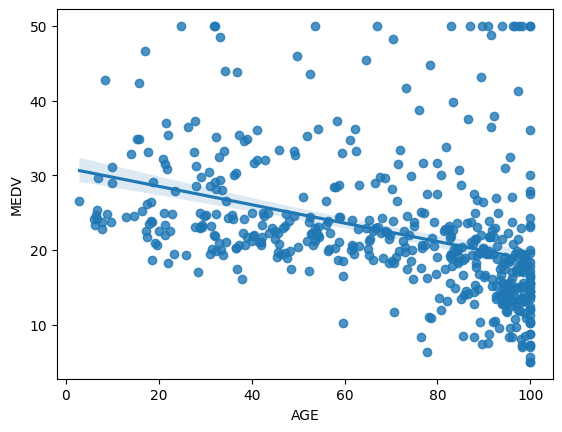

In [125]:
sns.regplot(x='AGE',y='MEDV', data=df)

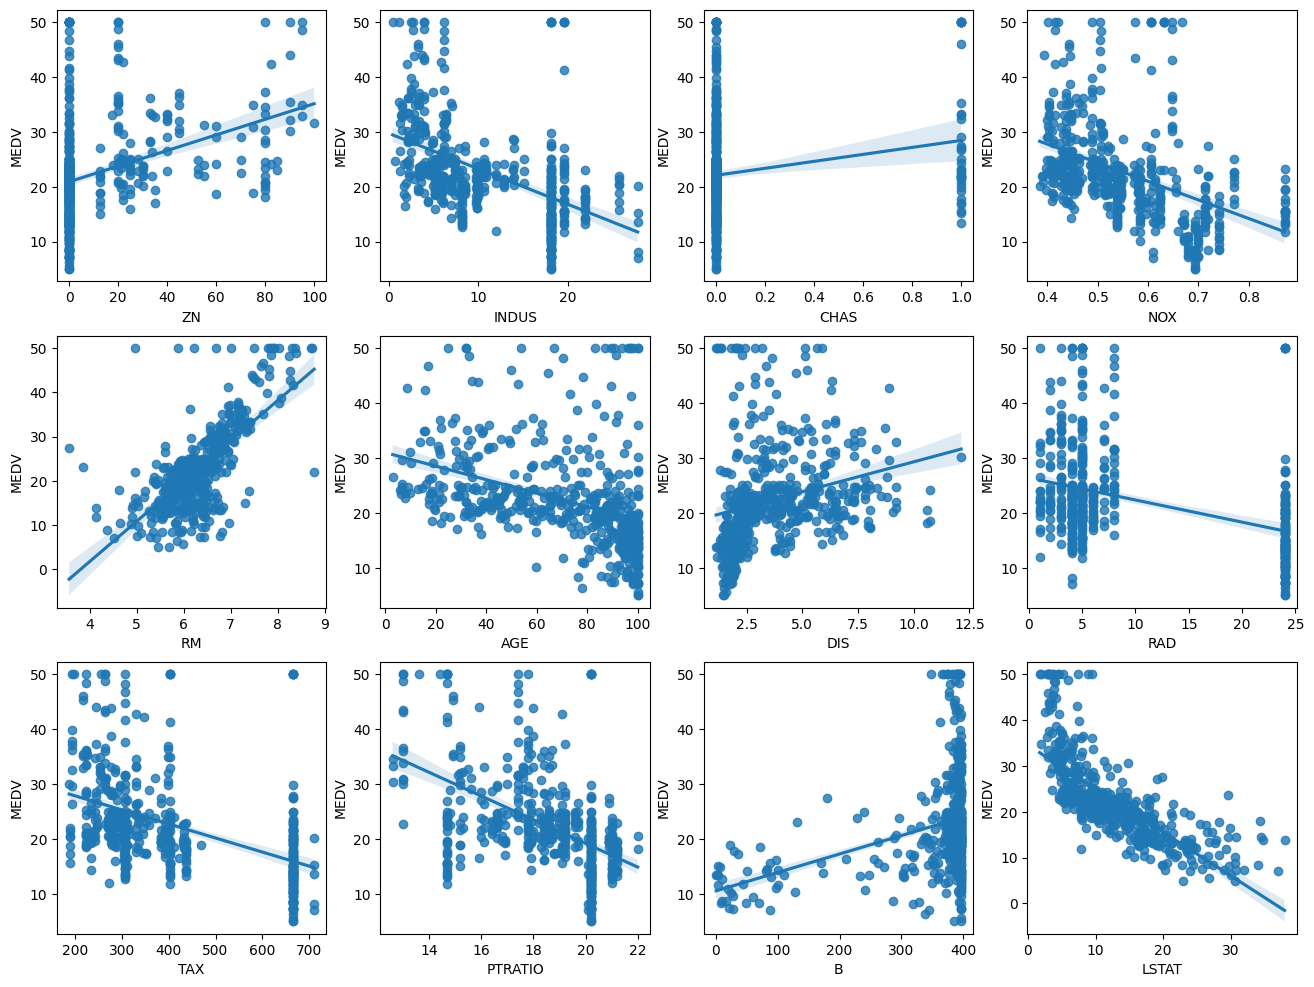

In [126]:
fig, axs = plt.subplots(3, 4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='MEDV', data=df, ax=axs[row][col])

- Feature 별 결정 계수 (R squared)

In [127]:
from sklearn.linear_model import LinearRegression
for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X,df.MEDV.values)
    score = lr.score(X, df.MEDV.values)
    print(f'{feature}:{score:.4f}')

CRIM:0.1508
ZN:0.1299
INDUS:0.2340
CHAS:0.0307
NOX:0.1826
RM:0.4835
AGE:0.1421
DIS:0.0625
RAD:0.1456
TAX:0.2195
PTRATIO:0.2578
B:0.1112
LSTAT:0.5441


##### 다중 선형 회귀

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.MEDV.values, test_size=0.1, random_state=2023
)

In [129]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
# 결정 계수 (R squared)
lr.score(X_test,y_test)

0.7271717469533572

In [131]:
# 가중치
lr.coef_

array([-1.08509288e-01,  4.73634512e-02,  2.93056817e-02,  2.88757692e+00,
       -1.77344364e+01,  3.87404592e+00, -1.10277063e-03, -1.47219747e+00,
        2.79148815e-01, -1.16000238e-02, -8.96196130e-01,  7.58599968e-03,
       -5.45214900e-01])

In [132]:
# bias 
lr.intercept_

35.78228139597135

- 회귀식
Target = 0.0011 * AGE + 0.0076*B + 3.9 * RM + ... +2.9 * CHAS+35.8

- 테스트 데이터에 적용

In [133]:
X_test[0], y_test[0]

(array([  7.02259,   0.     ,  18.1    ,   0.     ,   0.718  ,   6.006  ,
         95.3    ,   1.8746 ,  24.     , 666.     ,  20.2    , 319.98   ,
         15.7    ]),
 14.2)

In [134]:
# weight 와 bias를 이용하여
np.dot(lr.coef_, X_test[0]) + lr.intercept_

17.958305169593643

In [164]:
# predict() method 사용
lr.predict(X_test[0].reshape(1,-1))[0]

17.958305169593643

In [136]:
# 10개 테스트 데이터에 적용
pred = lr.predict(X_test)
for i in range(10):
    print(f'실제값:{y_test[i]},\t 예측값: {pred[i]:.4f}')

실제값:14.2,	 예측값: 17.9583
실제값:15.6,	 예측값: 15.6069
실제값:23.7,	 예측값: 27.4749
실제값:20.4,	 예측값: 19.7022
실제값:23.1,	 예측값: 24.9588
실제값:50.0,	 예측값: 40.8837
실제값:23.2,	 예측값: 22.2554
실제값:36.0,	 예측값: 36.1518
실제값:17.1,	 예측값: 19.5734
실제값:14.1,	 예측값: 16.1215


#### 회귀는 꼭 선형회귀 이어야 하나?


- SVR

In [137]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [138]:
svr = SVR()
svr.fit(X_train,y_train)
pred_sv = svr.predict(X_test)

In [139]:
r2_sv = r2_score(y_test,pred_sv)
mse_sv = mean_squared_error(y_test,pred_sv)

- Random Forest Regressor

In [140]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

- XGBoost

In [141]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train,y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

- Linear Regression

In [142]:
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

- 비교

In [161]:
print('\t\tLR\tSV\tRF\tXG')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

		LR	SV	RF	XG
R squared	0.7272	0.2042	0.8613	0.8662
Mean squared E	18.3886	53.6350	9.3466	9.0214


In [ ]:
df = pd.DataFrame({
    'Y':y_test, 'SV': pred_sv, 'RF': pred_rf, 'XG': pred_xg
})
df.head(10)

,Y,SV,RF,XG
0,14.2,15.017989,15.338,15.283259
1,15.6,21.968696,16.819,15.724390
2,23.7,23.817999,24.465,26.750814
3,20.4,22.621478,19.539,19.455095
4,23.1,23.143946,23.844,23.837950
5,50.0,19.982511,47.176,49.939842
6,23.2,15.991492,19.328,18.950800
7,36.0,22.930248,36.970,36.674747
8,17.1,19.179914,18.332,18.373552
9,14.1,13.387749,14.953,14.692045


#### 규제 선형회귀

In [144]:
from sklearn.linear_model import Ridge

In [145]:
ridge = Ridge(random_state=2023)
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 2023,
 'solver': 'auto',
 'tol': 0.0001}

In [146]:
ridge.fit(X_train,y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test,pred_rg)
mse_rg = mean_squared_error(y_test,pred_rg)

In [147]:
r2_rg, mse_rg

(0.7247569398981955, 18.55136320289899)

In [148]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=2023)
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 2023,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [149]:
lasso.fit(X_train,y_train)
pred_ls = ridge.predict(X_test)
r2_ls = r2_score(y_test,pred_ls)
mse_ls = mean_squared_error(y_test,pred_ls)

In [150]:
r2_ls, mse_ls

(0.7247569398981955, 18.55136320289899)

In [162]:
print('\t\tLR\tSV\tRF\tXG\tRG\tLS')
print(f'R squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}\t{r2_rg:.4f}\t{r2_ls:.4f}')
print(f'Mean squared E\t{mse_lr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}')

		LR	SV	RF	XG	RG	LS
R squared	0.7272	0.2042	0.8613	0.8662	0.7248	0.7248
Mean squared E	18.3886	53.6350	9.3466	9.0214	18.5514	18.5514
